In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats.kde import gaussian_kde

In [3]:
class Gaussian(object):

  def __init__(self,x,M1,S1,M2,S2):
    self.G1 = stats.norm.pdf(x, M1, S1)
    self.M1 = M1
    self.S1 = S1
    self.G2 = stats.norm.pdf(x, M2, S2)
    self.M2 = M2
    self.S2 = S2

  def mix_G(self,x):
    return (0.4 * self.G1 + 0.6 * self.G2)

  def mix_G_distribution(self):
    ratio = 0.3
    if np.random.rand() < ratio:
      return np.random.normal(self.M1, self.S1)
    else:
      return np.random.normal(self.M2, self.S2)


In [4]:
def k_NM(test, train, k):
  N = 50
  train = np.array(train)
  train.sort()
  r = []
  for i in test:
    distance = np.abs(train - i)
    distance.sort()
    r.append(distance[k-1])
  r = np.array(r)
  return k/(2 * r * N)

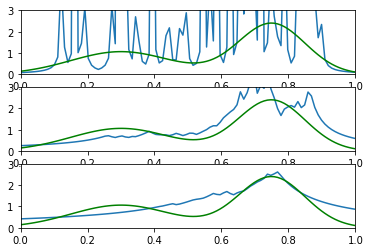

In [11]:
x = np.linspace(0,1,100)
M1 = 0.3
S1 = 0.15
M2 = 0.75
S2 = 0.1
model = Gaussian(x,M1,S1,M2,S2)
N = 50
Data = np.array([model.mix_G_distribution() for n in range(N)])
k_list = [1,10,30]

for i,k in enumerate(k_list):
  plt.subplot(3,1,i+1)
  plt.plot(x, k_NM(x, Data, k))
  plt.plot(x, model.mix_G(x), "g-")
  plt.xlim(0,1)
  plt.ylim(0,3)

plt.show()